

**경제학에서의 포텐셜 함수 최적화 문제(소비자 효용 극대화****사례 )**


소비자 효용 극대화는 경제학에서 가장 기본적인 최적화 문제 중 하나입니다. 소비자는 주어진 예산으로 두 가지 상품을 구매하면서 효용을 극대화하고자 합니다. 효용 함수는 소비자가 두 상품을 소비함으로써 얻는 만족도를 수학적으로 표현하며, 이 효용을 최대화하는 상품의 조합을 찾는 것이 목표입니다.


**예시 상황**

-  소비자가 두 가지 상품 $x$ 와 $y$ 를 구매합니다.
-  소비자의 효용 함수는 $U(x,y)=x^{0.5} \times y^{0.5}$ 로 주어집니다. 이는 두 상품을 소비할 때의 만족도를 나타내며, 소비자는 이 효용을 최대화하고자 합니다.
-  소비자의 예산은 100달러이며, 상품 $x$ 의 가격은 20달러, 상품 $y$ 의 가격은 10달러입니다.
-  제약 조건은 $20x+10y=100$ 입니다.

**최적화 문제**

-  **목적 함수**: $U(x,y)=x^{0.5} \times y^{0.5}$
-  **제약 조건**: $20x+10y=100$

이 문제를 해결하기 위해 라그랑주 승수법을 사용하여 최적의 $x$ 와 $y$ 값을 찾습니다.


In [1]:
% 변수 설정
syms x y lambda

% 효용 함수와 예산 제약
U = x^0.5 * y^0.5; % 효용 함수
budget_constraint = 20*x + 10*y - 100; % 예산 제약

% 라그랑주 함수
L = U + lambda * (100 - 20*x - 10*y);

% 편미분을 통해 최적 조건 찾기
gradL_x = diff(L, x); % L을 x에 대해 미분
gradL_y = diff(L, y); % L을 y에 대해 미분
gradL_lambda = diff(L, lambda); % L을 lambda에 대해 미분

% 방정식 시스템 설정
eq1 = gradL_x == 0;
eq2 = gradL_y == 0;
eq3 = gradL_lambda == 0;

% 방정식 시스템 풀기
solution = solve([eq1, eq2, eq3], [x, y, lambda]);

% 최적의 값
optimal_x = double(solution.x);
optimal_y = double(solution.y);
optimal_utility = double(subs(U, [x, y], [optimal_x, optimal_y]));

% 결과 출력
fprintf('최적의 x 값: %.2f\n', optimal_x);

최적의 x 값: 2.50

In [2]:
fprintf('최적의 y 값: %.2f\n', optimal_y);

최적의 y 값: 5.00

In [3]:
fprintf('최대 효용: %.2f\n', optimal_utility);

최대 효용: 3.54


-  **변수 설정**: <samp>syms</samp>를 사용하여 심볼릭 변수를 정의합니다.
-  **효용 함수와 제약 조건**: 소비자의 효용 함수 $U(x,y)$ 와 예산 제약을 설정합니다.
-  **라그랑주 함수**: 효용 함수와 제약 조건을 사용하여 라그랑주 함수를 정의합니다.
-  **편미분**: 라그랑주 함수를 각 변수에 대해 편미분하여 최적 조건을 찾습니다.
-  **방정식 풀기**: <samp>solve</samp>를 사용하여 방정식 시스템을 풉니다.
-  **최적 값 및 효용 계산**: 최적의 $x$ 와 $y$ 값을 찾고 최대 효용을 계산합니다.
-  **결과 출력**: 최적의 구매량과 최대 효용을 출력합니다


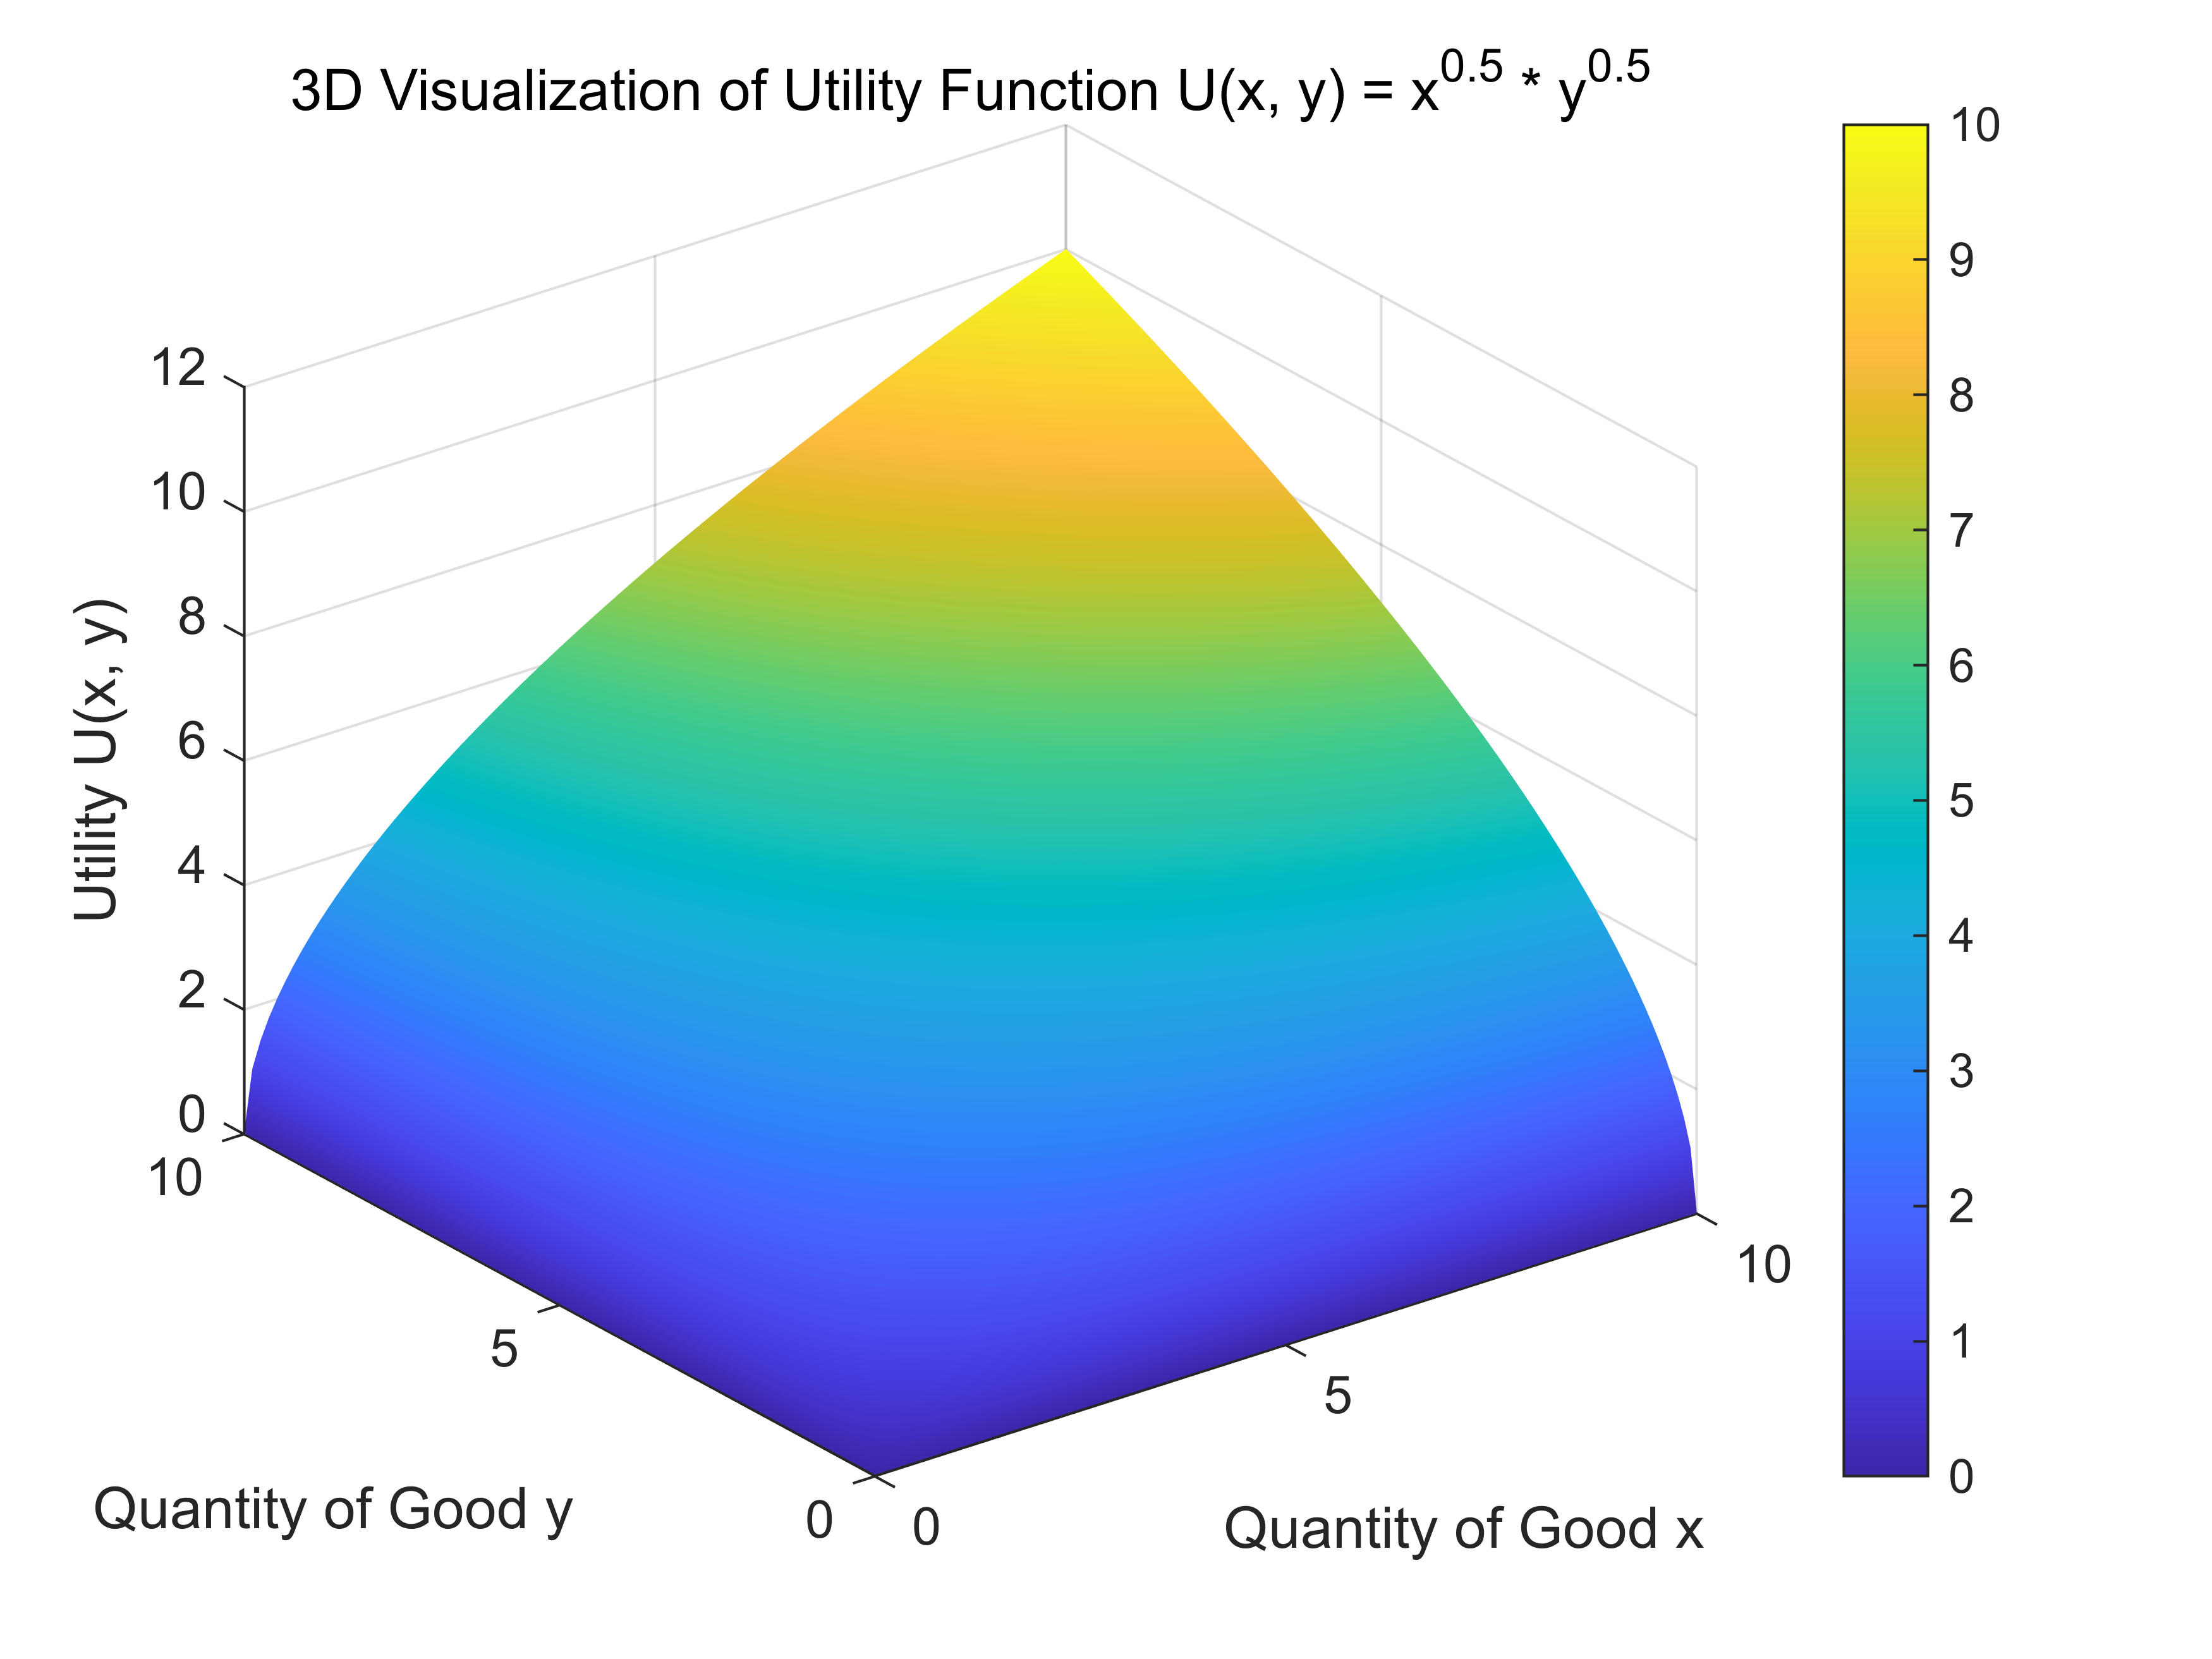

In [4]:
% 변수 설정
x = linspace(0, 10, 100); % x의 범위 설정
y = linspace(0, 10, 100); % y의 범위 설정

% 그리드 생성
[X, Y] = meshgrid(x, y);

% 효용 함수 계산
U = sqrt(X) .* sqrt(Y); % U(x, y) = x^0.5 * y^0.5

% 3D 그래프 그리기
figure;
surf(X, Y, U);

% 그래프 레이블 추가
xlabel('Quantity of Good x');
ylabel('Quantity of Good y');
zlabel('Utility U(x, y)');
title('3D Visualization of Utility Function U(x, y) = x^{0.5} * y^{0.5}');

% 그래프 스타일 설정
shading interp; % 색상 보간
colorbar; % 색상 바 추가


**전망 이론(Prospect Theory) 함수의 표현과 포텐셜 함수 여부****전망 이론 개요**


전망 이론은 심리학자 \*\*다니엘 카너먼(Daniel Kahneman)\*\*과 \*\*아모스 트버스키(Amos Tversky)\*\*가 1979년에 개발한 이론으로, 사람들이 불확실한 상황에서 의사결정을 할 때 기대효용 이론과 다르게 행동하는 현상을 설명합니다. 이 이론의 핵심은 사람들이 이득과 손실을 다르게 평가하며, 손실에 대해 더 민감하게 반응하는 경향이 있다는 것입니다.


전망 이론은 두 가지 주요 구성 요소를 가지고 있습니다:

1.  **가치 함수(Value Function)**: 이득과 손실을 비대칭적으로 평가하며, 일반적으로 손실에 더 민감하게 반응하는 함수입니다. 가치 함수는 다음과 같은 특성을 가집니다:

-  이득에서는 점차 체감하는 양의 기울기를 가짐.
-  손실에서는 이득에 비해 더 가파른 음의 기울기를 가짐.
-  함수는 원점(참조점)에서 기울기가 변화합니다.

1.  **확률 가중 함수(Probability Weighting Function)**: 실제 확률을 왜곡하는 함수로, 낮은 확률은 과대평가되고 높은 확률은 과소평가되는 경향을 나타냅니다.

**전망 이론의 함수 예시**


전망 이론의 가치 함수는 일반적으로 다음과 같이 표현됩니다:


 $v(x)=\left\lbrace \begin{array}{cc} x^{\alpha }  & \textrm{if}\;x\ge 0\newline -\lambda (-x)^{\beta }  & \textrm{if}\;x<0 \end{array}\right.$ ​


여기서,

-  $x$ : 이득 또는 손실의 크기.
-  $\alpha ,\beta$ : 0과 1 사이의 매개변수로, 일반적으로 $\alpha =\beta$ 로 가정됩니다.
-  $\lambda$ : 손실 회피 계수로, 손실에 대한 민감도를 나타내며 보통 2보다 큽니다.


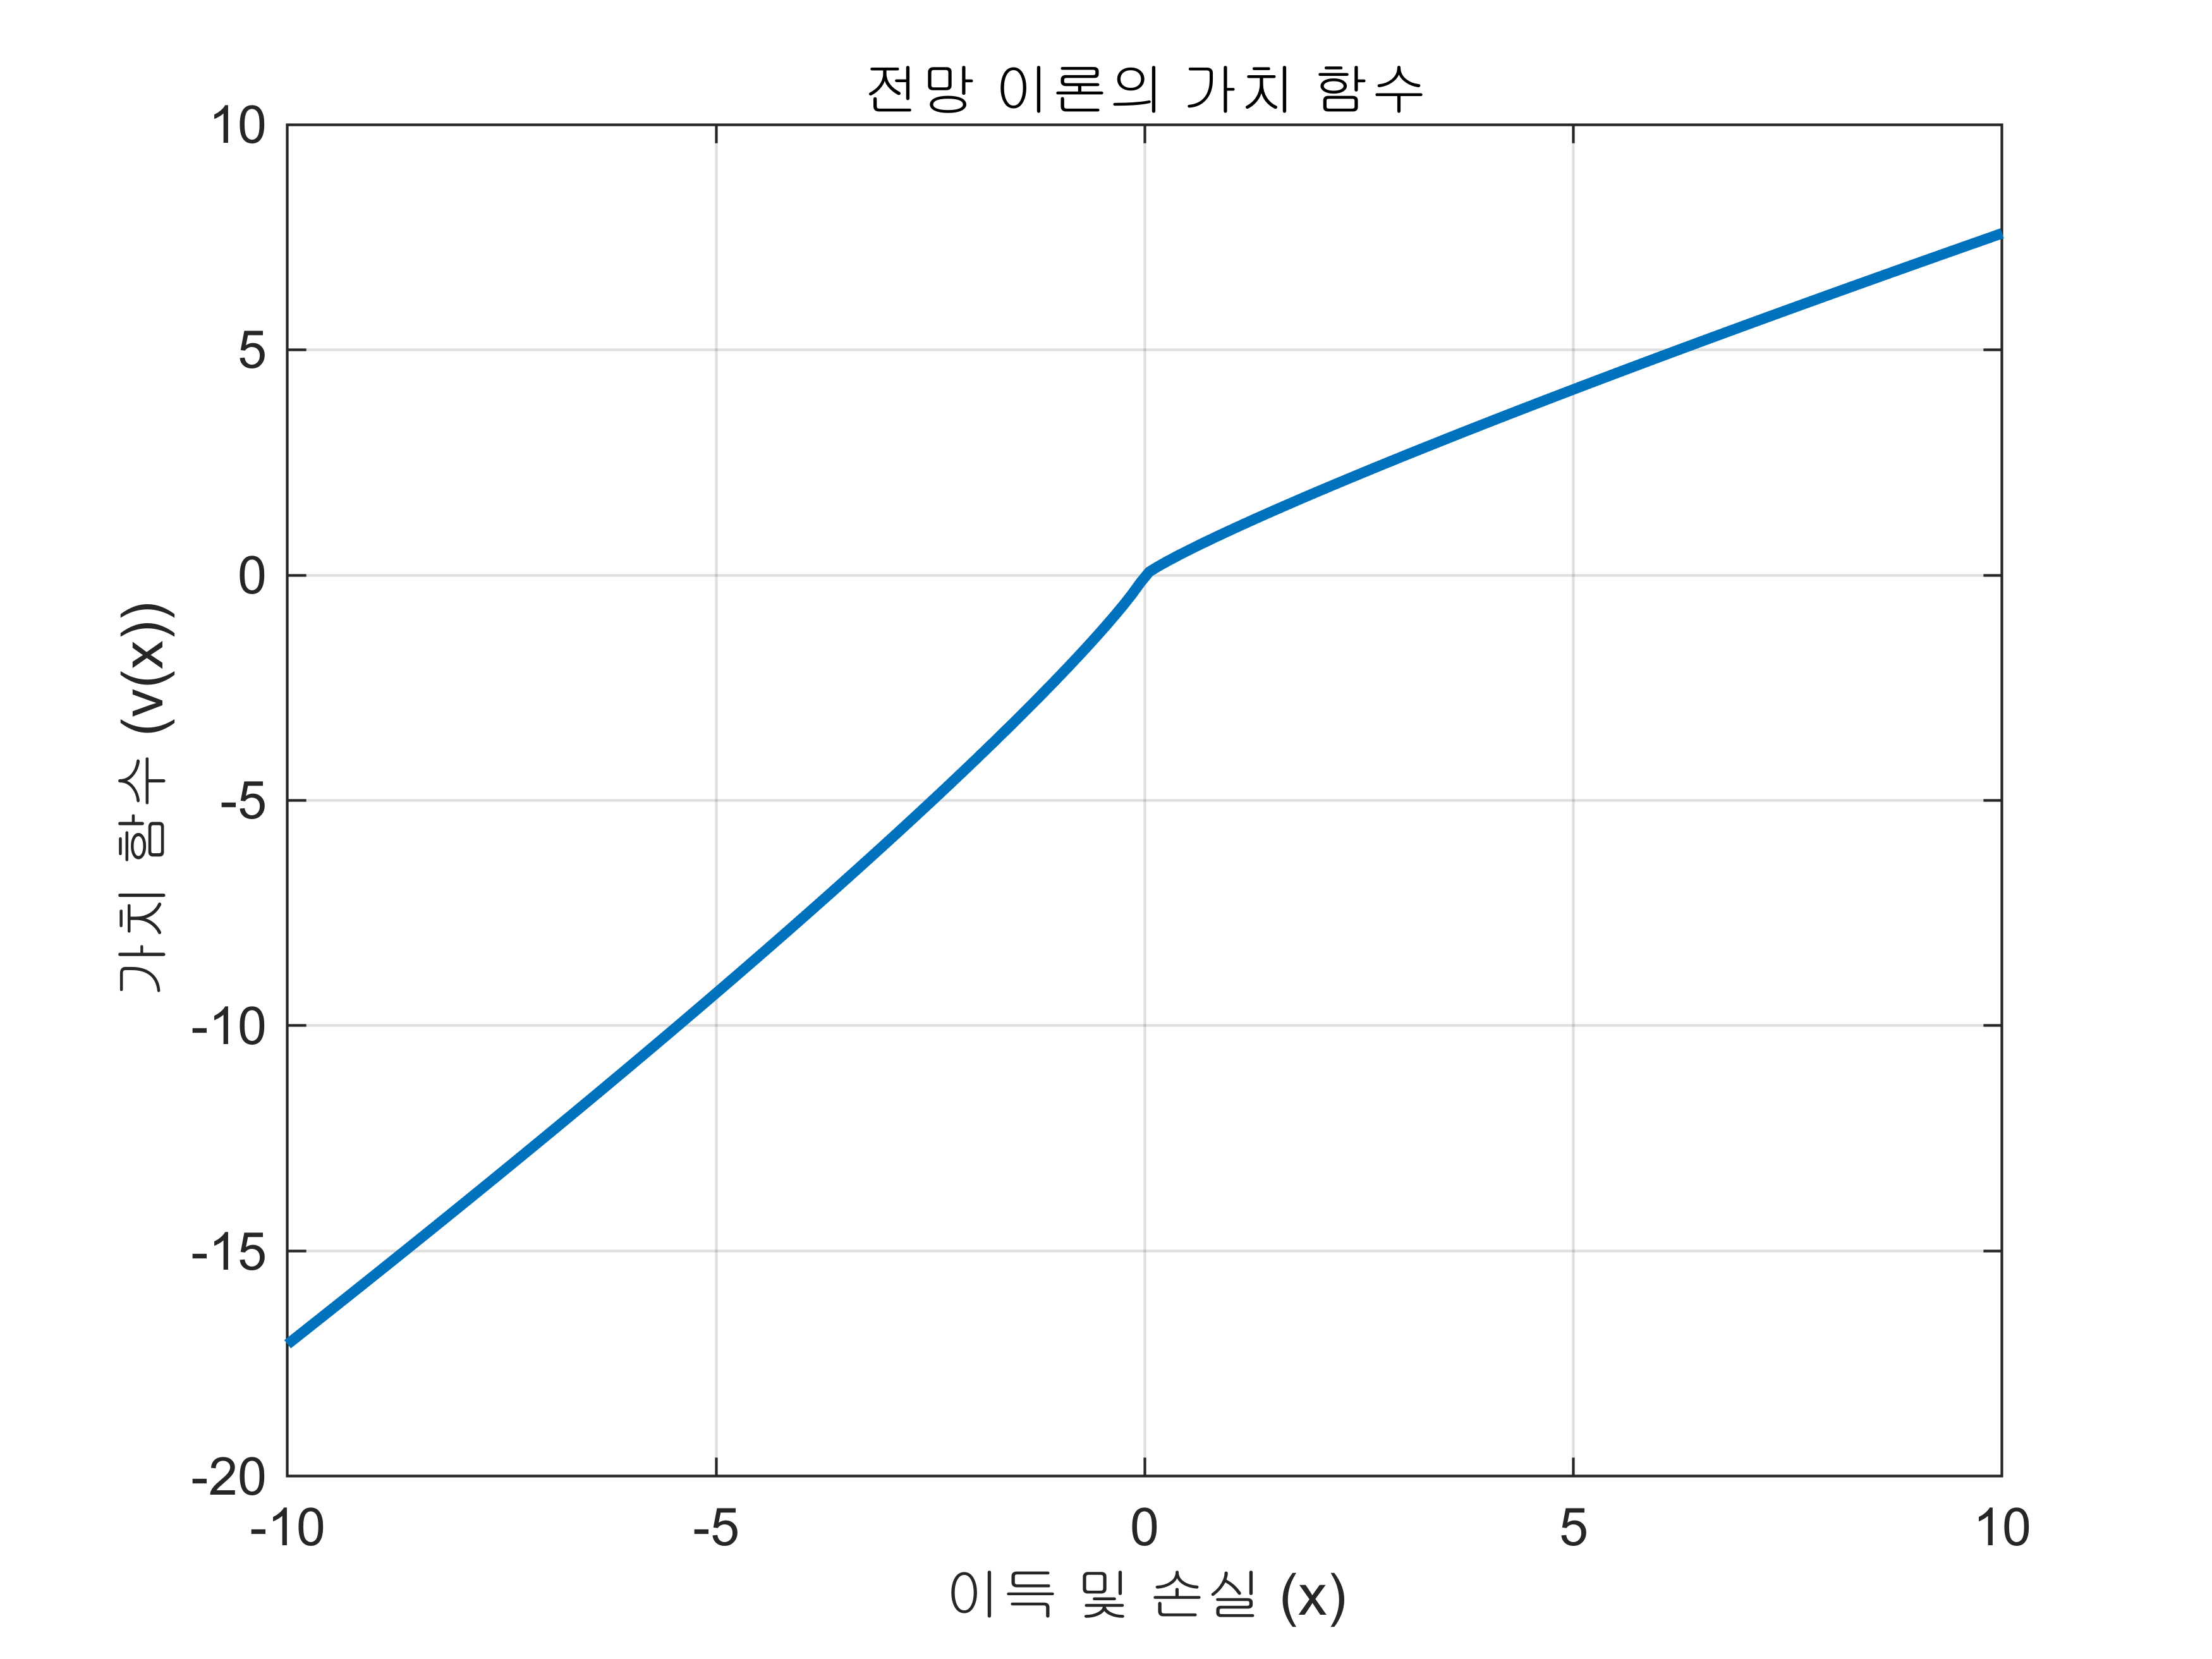

In [5]:
% 전망 이론의 매개변수 설정
alpha = 0.88; % 이득에 대한 매개변수
beta = 0.88;  % 손실에 대한 매개변수
lambda = 2.25; % 손실 회피 계수

% x 값 설정
x = linspace(-10, 10, 200); % 이득과 손실의 범위

% 가치 함수 계산
v = zeros(size(x)); % 초기화
for i = 1:length(x)
    if x(i) >= 0
        v(i) = x(i)^alpha;
    else
        v(i) = -lambda * (-x(i))^beta;
    end
end

% 그래프 그리기
figure;
plot(x, v, 'LineWidth', 2);
grid on;
xlabel('이득 및 손실 (x)');
ylabel('가치 함수 (v(x))');
title('전망 이론의 가치 함수');


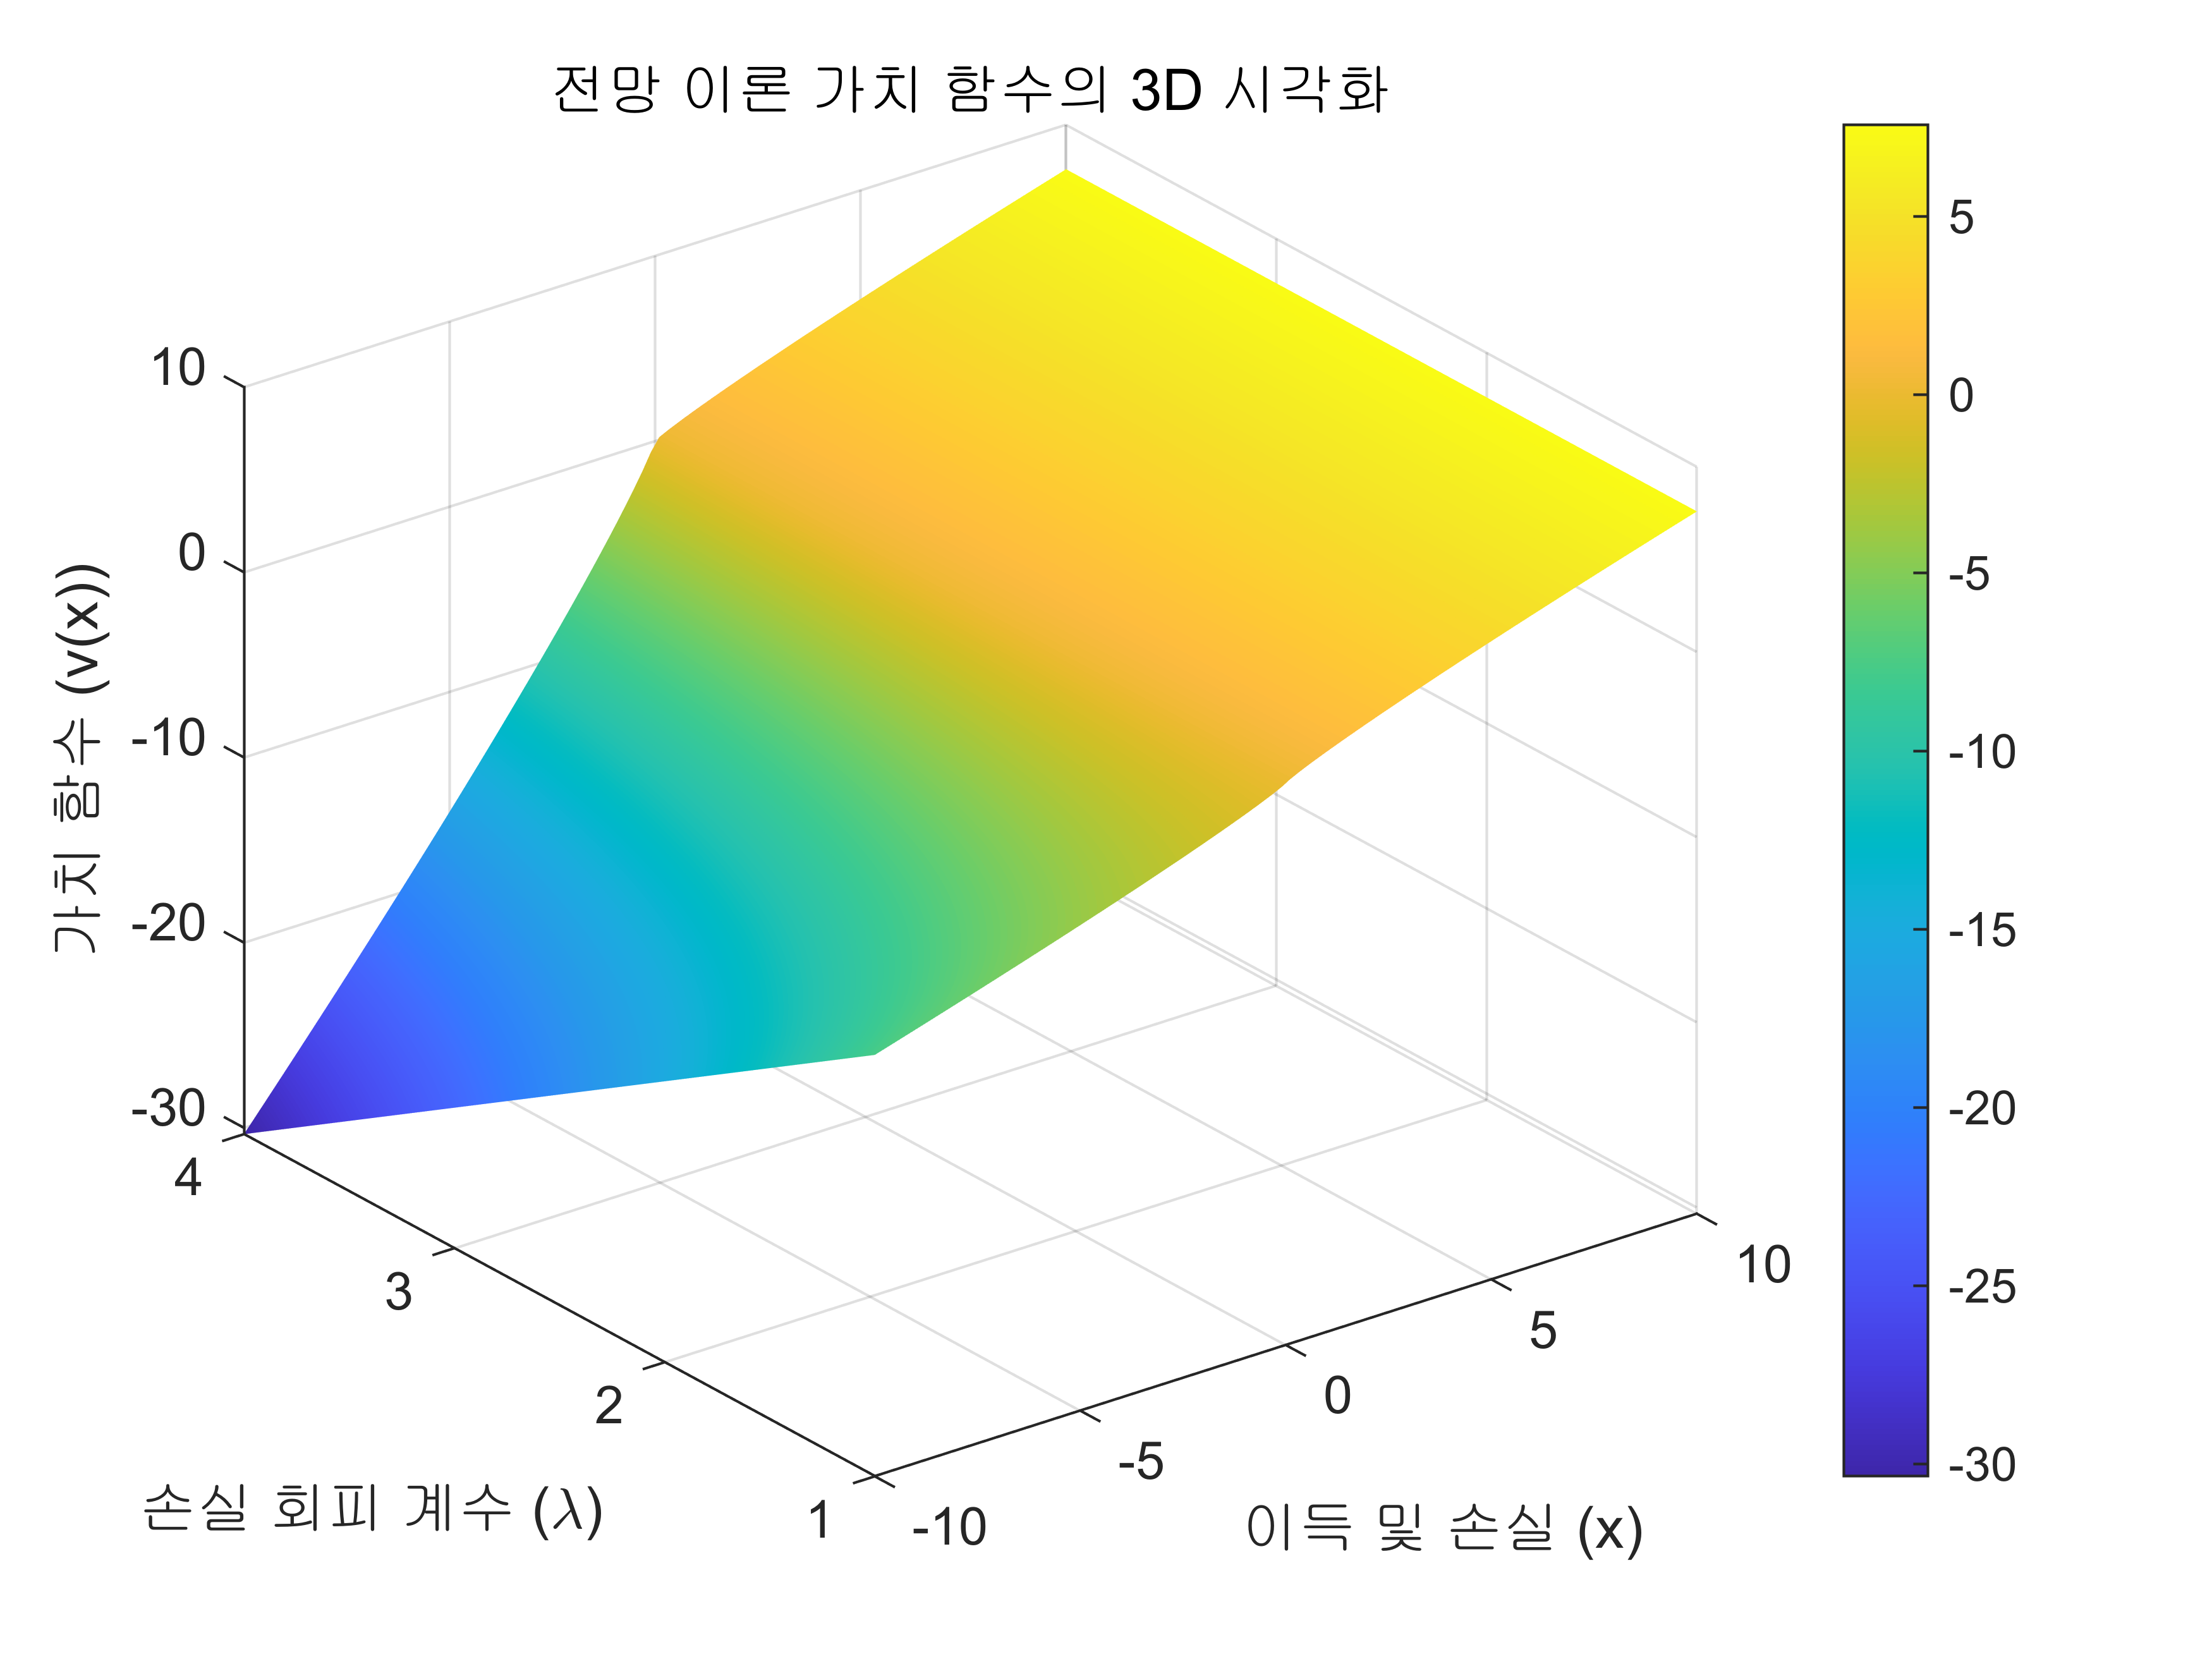

In [6]:
% 이득과 손실의 범위 설정
x = linspace(-10, 10, 100);

% 매개변수 범위 설정 (손실 회피 계수 lambda를 변경해봅니다)
lambda_values = linspace(1, 4, 50);

% 그리드 생성
[X, L] = meshgrid(x, lambda_values);

% 가치 함수 계산
V = zeros(size(X)); % 초기화

% 가치 함수의 계산을 위해 루프 사용
for i = 1:length(lambda_values)
    lambda = lambda_values(i);
    for j = 1:length(x)
        if X(i, j) >= 0
            V(i, j) = X(i, j)^0.88; % 이득에 대한 alpha 고정
        else
            V(i, j) = -lambda * (-X(i, j))^0.88; % 손실에 대한 beta 고정
        end
    end
end

% 3D 그래프 그리기
figure;
surf(X, L, V);
xlabel('이득 및 손실 (x)');
ylabel('손실 회피 계수 (\lambda)');
zlabel('가치 함수 (v(x))');
title('전망 이론 가치 함수의 3D 시각화');
colorbar;
shading interp;


**예시 1: 투자 의사결정 모델**


이 예시에서는 투자 수익률이 양수(이득) 또는 음수(손실)일 때, 손실 회피 성향을 반영하여 로지스틱 회귀 모델을 구축합니다.


In [7]:
% 1. 데이터 준비
num_samples = 100;
returns = linspace(-0.2, 0.2, num_samples)'; % -20%에서 20%까지의 수익률
outcome = (returns > 0) + 0; % 수익이 양수면 1, 음수면 0

% 2. 전망 이론 가치 함수 적용
alpha = 0.88;
beta = 0.88;
lambda = 2.25;

% 가치 함수 적용
prospect_value = zeros(size(returns));
for i = 1:length(returns)
    if returns(i) >= 0
        prospect_value(i) = returns(i)^alpha;
    else
        prospect_value(i) = -lambda * (-returns(i))^beta;
    end
end

% 3. 로지스틱 회귀 모델 학습 (패널티 적용)
X = [ones(num_samples, 1), prospect_value];
b = glmfit(X, outcome, 'binomial', 'link', 'logit', 'Options', statset('MaxIter', 100, 'Display', 'off'), 'LikelihoodPenalty', 'jeffreys-prior');

경고: X의 조건이 나쁘거나 모델이 과모수화되었고
일부 계수를 식별할 수 없습니다. 예측할 때
이에 유의해야 합니다.


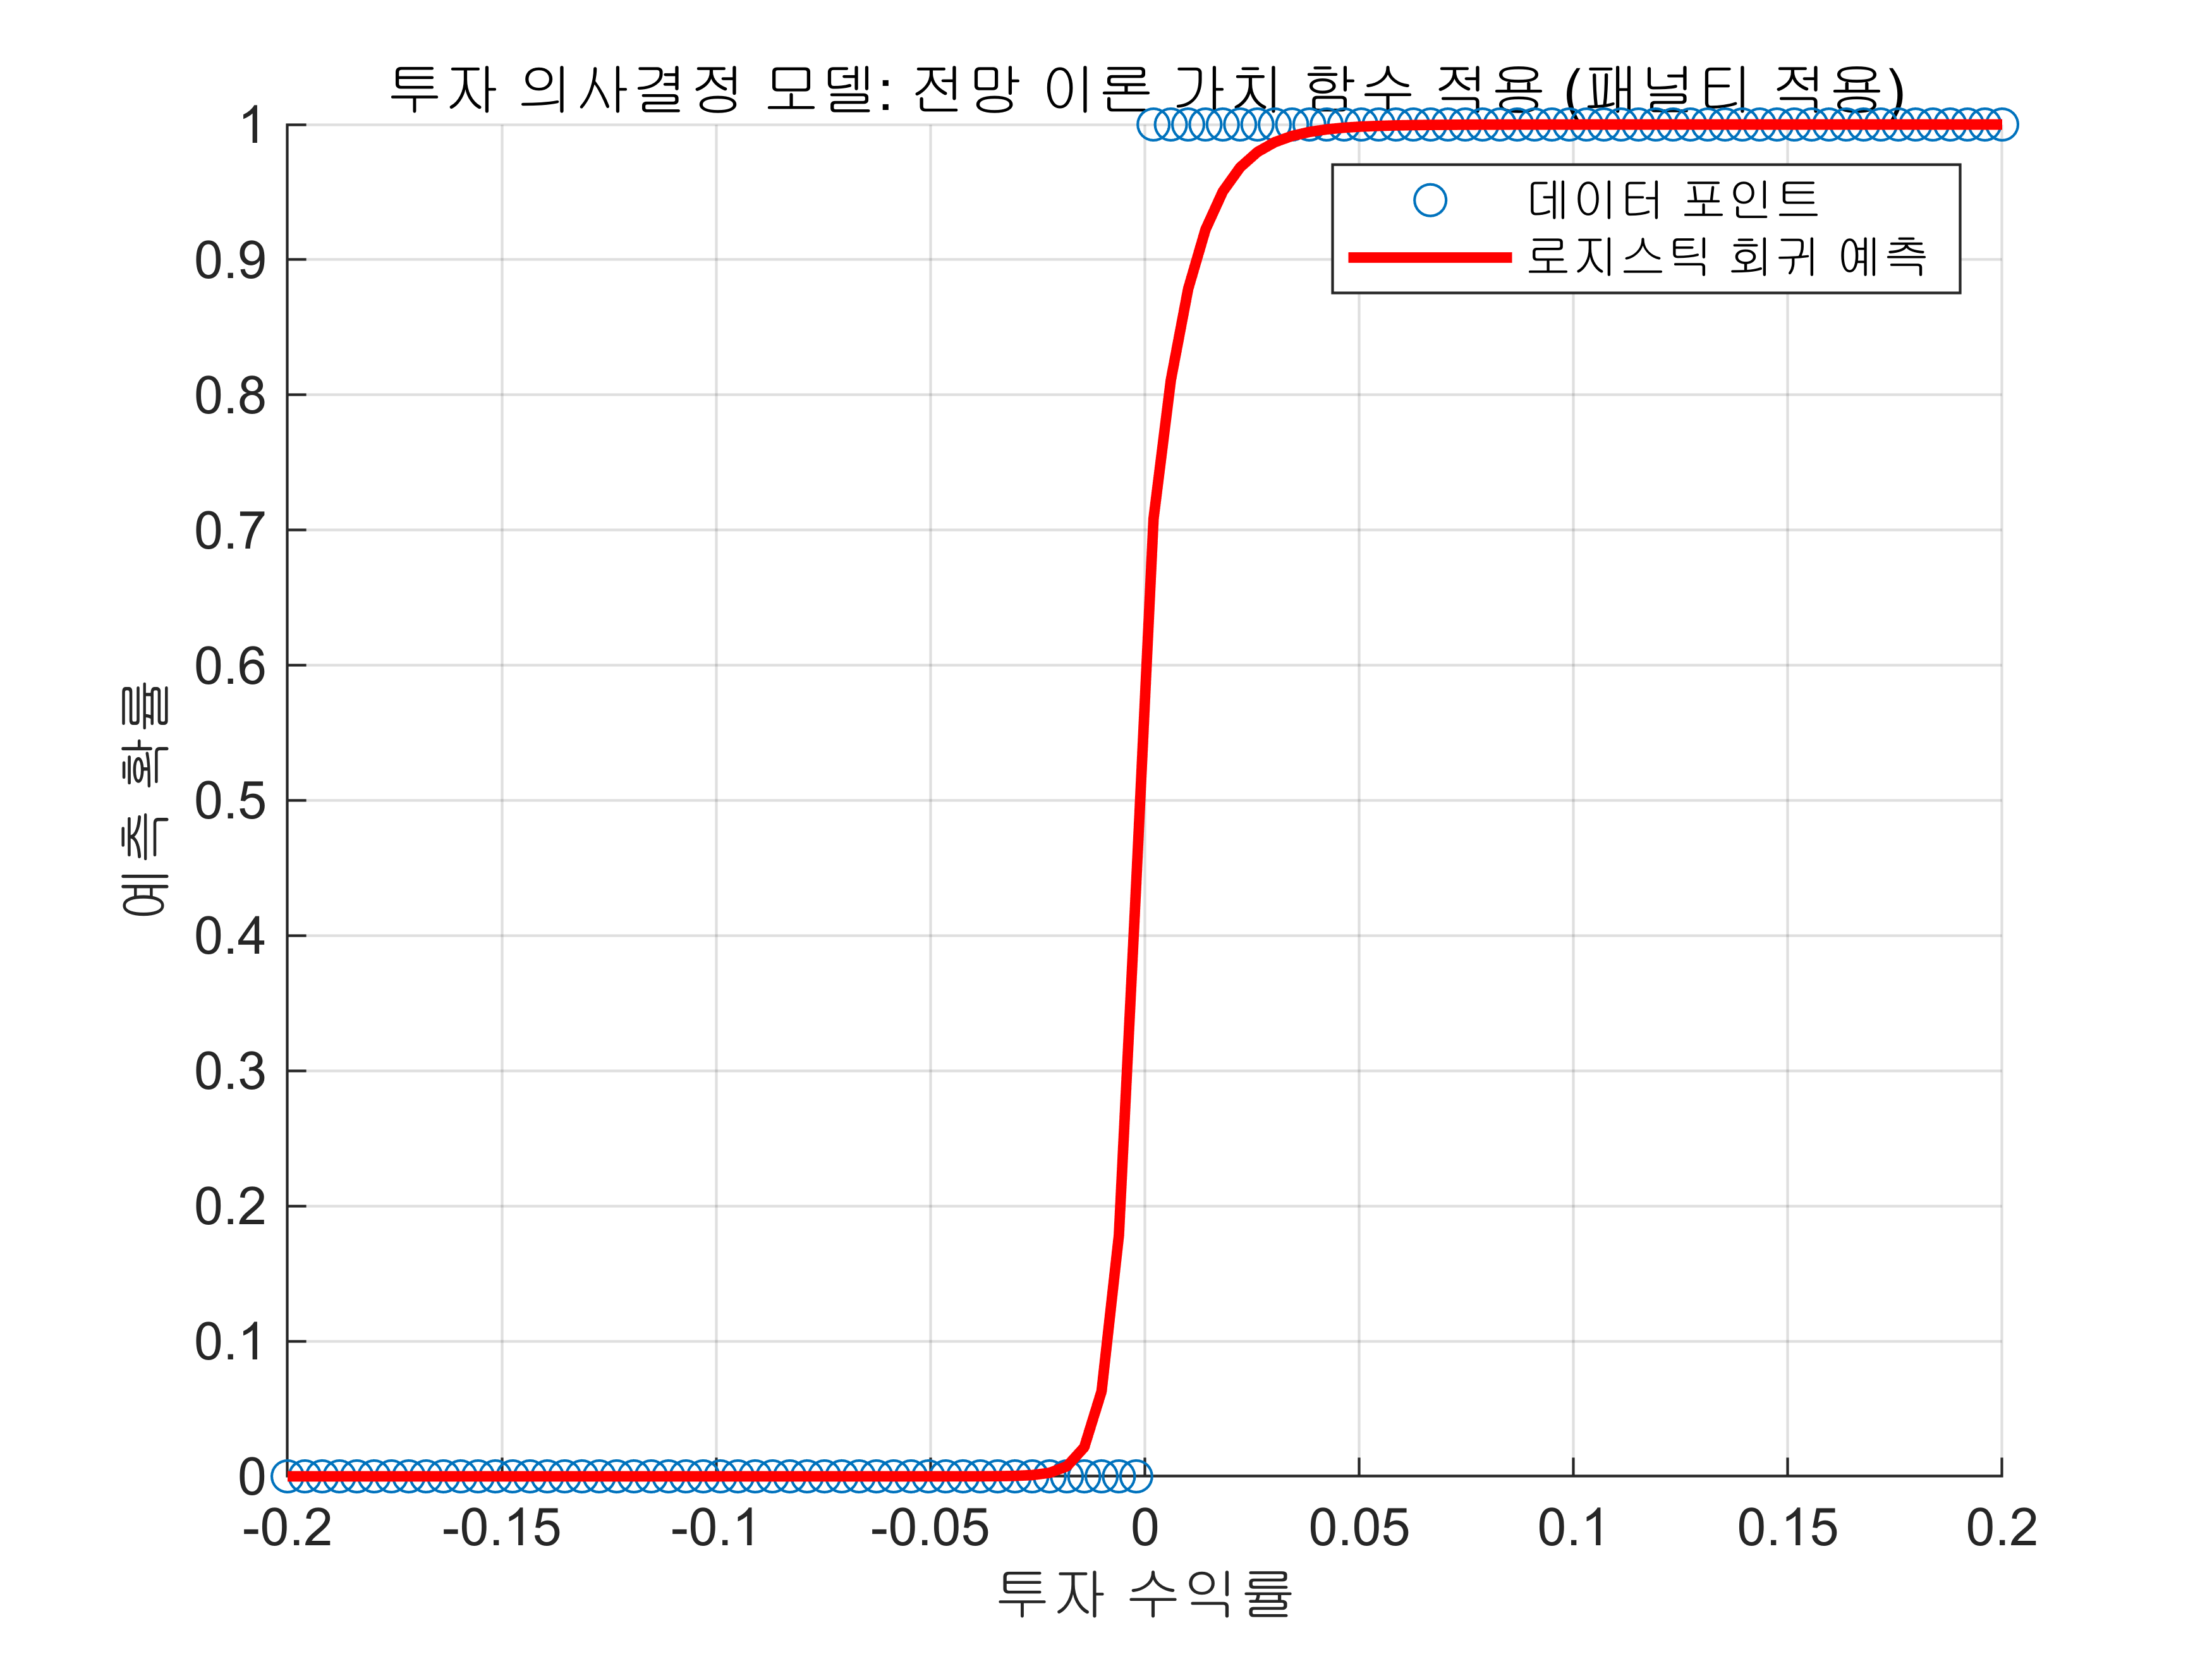

In [8]:

% 4. 예측 및 결과 시각화
yhat = glmval(b, X, 'logit');

figure;
scatter(returns, outcome, 'o');
hold on;
plot(returns, yhat, 'r-', 'LineWidth', 2);
xlabel('투자 수익률');
ylabel('예측 확률');
title('투자 의사결정 모델: 전망 이론 가치 함수 적용 (패널티 적용)');
legend('데이터 포인트', '로지스틱 회귀 예측');
grid on;



**예시 2: 소비자 구매 결정 모델**


이 예시에서는 제품 가격 변화에 따른 소비자 구매 의사결정을 전망 이론을 활용하여 예측합니다. 가격 인상(손실)과 할인(이득)에 대해 소비자의 반응이 다르게 나타날 수 있습니다.


In [9]:
% 1. 데이터 준비
num_samples = 100;
price_change = linspace(-0.5, 0.5, num_samples)'; % -50%에서 50%까지의 가격 변화
purchase_decision = (price_change < 0) + 0; % 가격 인하(할인) 시 구매 (1), 가격 인상 시 비구매 (0)

% 2. 전망 이론 가치 함수 적용
alpha = 0.88;
beta = 0.88;
lambda = 2.25;

% 가치 함수 적용
prospect_value = zeros(size(price_change));
for i = 1:length(price_change)
    if price_change(i) >= 0
        prospect_value(i) = price_change(i)^alpha;
    else
        prospect_value(i) = -lambda * (-price_change(i))^beta;
    end
end

% 3. 로지스틱 회귀 모델 학습 (패널티 적용)
X = [ones(num_samples, 1), prospect_value];
b = glmfit(X, purchase_decision, 'binomial', 'link', 'logit', 'Options', statset('MaxIter', 100, 'Display', 'off'), 'LikelihoodPenalty', 'jeffreys-prior');

경고: X의 조건이 나쁘거나 모델이 과모수화되었고
일부 계수를 식별할 수 없습니다. 예측할 때
이에 유의해야 합니다.


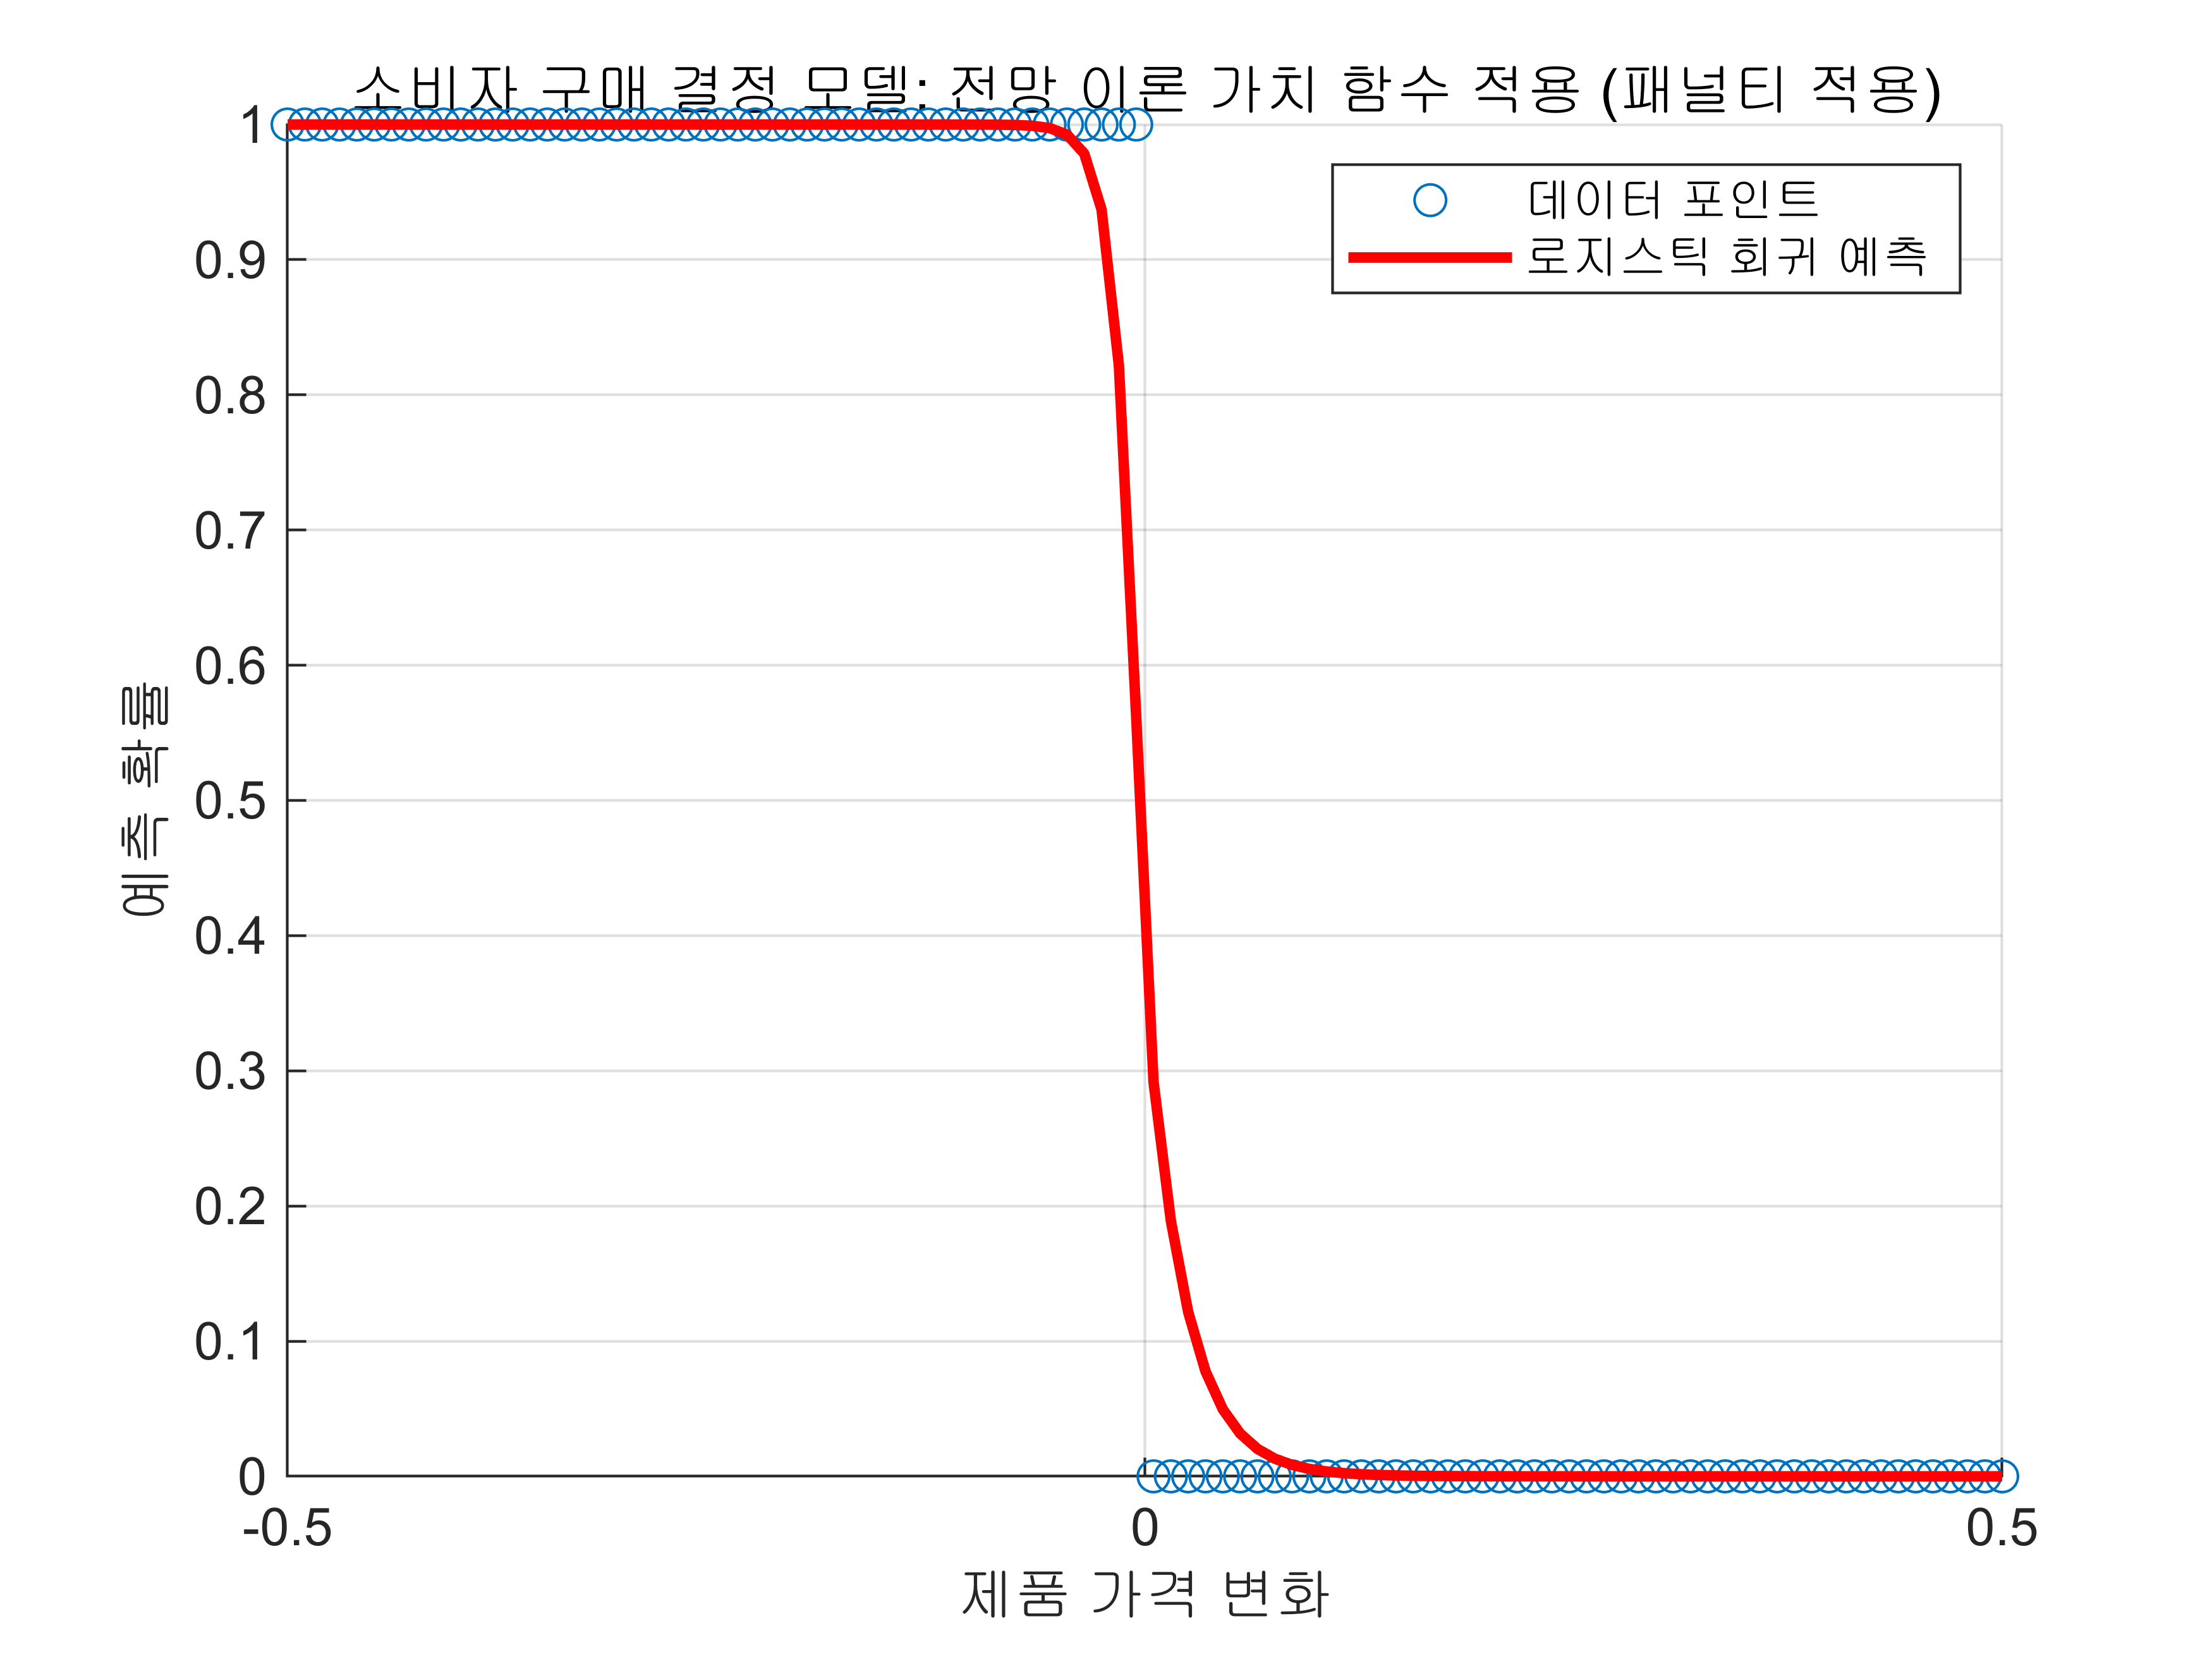

In [10]:

% 4. 예측 및 결과 시각화
yhat = glmval(b, X, 'logit');

figure;
scatter(price_change, purchase_decision, 'o');
hold on;
plot(price_change, yhat, 'r-', 'LineWidth', 2);
xlabel('제품 가격 변화');
ylabel('예측 확률');
title('소비자 구매 결정 모델: 전망 이론 가치 함수 적용 (패널티 적용)');
legend('데이터 포인트', '로지스틱 회귀 예측');
grid on;



**1. 투자 의사결정 모델의 신경망 이론****이론적 배경**

-  **투자 의사결정**: 투자자들은 자산의 수익률에 따라 투자 결정을 합니다. 그러나 단순한 수익률뿐만 아니라, 이득과 손실에 대한 심리적 반응도 중요한 역할을 합니다.
-  **전망 이론의 적용**: 전망 이론은 투자자들이 동일한 금액의 이득과 손실에 대해 다르게 반응하는 경향을 설명합니다. 즉, 손실은 동일한 크기의 이득보다 더 큰 영향을 미칩니다. 이 점을 신경망 모델에 통합하여 투자자의 의사결정 패턴을 예측합니다.

**신경망의 역할**

-  **비선형 패턴 학습**: 투자 의사결정은 수익률과 투자자의 반응 사이에 복잡한 비선형 관계를 가질 수 있습니다. 신경망은 이러한 비선형 패턴을 학습하고 예측하는 데 적합합니다.
-  **전망 이론 가치 함수의 통합**: 신경망 모델은 전망 이론의 가치 함수를 입력 특성으로 사용하여, 투자자들이 이득과 손실에 어떻게 반응하는지를 학습할 수 있습니다. 이를 통해 모델은 단순한 선형 회귀보다 더 복잡한 의사결정 패턴을 반영할 수 있습니다.
-  **은닉층의 역할**: 신경망의 은닉층은 입력 데이터의 복잡한 특징을 추출하고, 이득과 손실에 대한 민감도를 반영합니다. 이를 통해 수익률과 투자 의사결정 간의 비선형적 관계를 학습합니다.

**모델의 기대 효과**

-  투자 의사결정 모델의 신경망은 다양한 투자 수익률 상황에서 투자자의 행동을 예측하는 데 사용됩니다.
-  전망 이론의 특성을 반영함으로써, 전통적인 선형 모델보다 투자자들이 실제로 어떻게 행동하는지 더 정확하게 예측할 수 있습니다.
-  이를 통해 금융 시장 분석이나 포트폴리오 관리에서의 의사결정 지원에 활용할 수 있습니다.


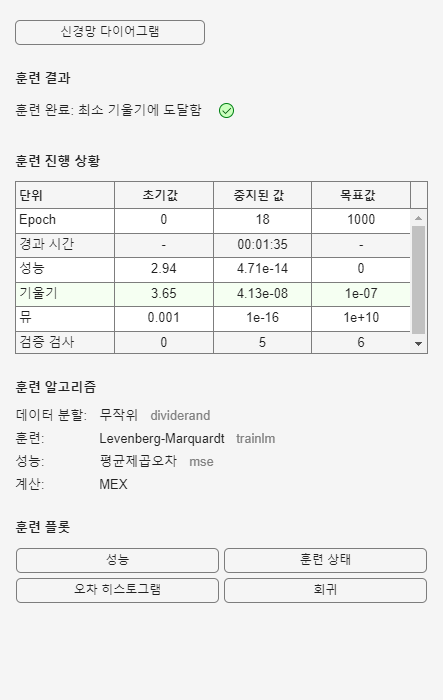

In [11]:
% 신경망을 사용하여 투자 의사결정 모델 학습

% 1. 데이터 준비
num_samples = 100;
returns = linspace(-0.2, 0.2, num_samples)'; % -20%에서 20%까지의 수익률
outcome = (returns > 0) + 0; % 수익이 양수면 1, 음수면 0

% 2. 전망 이론 가치 함수 적용
alpha = 0.88;
beta = 0.88;
lambda = 2.25;

% 가치 함수 적용
prospect_value = zeros(size(returns));
for i = 1:length(returns)
    if returns(i) >= 0
        prospect_value(i) = returns(i)^alpha;
    else
        prospect_value(i) = -lambda * (-returns(i))^beta;
    end
end

% 3. 신경망 모델 학습
% 신경망 구조 설정
net = feedforwardnet(10); % 10개의 은닉층 뉴런
net = train(net, prospect_value', outcome');


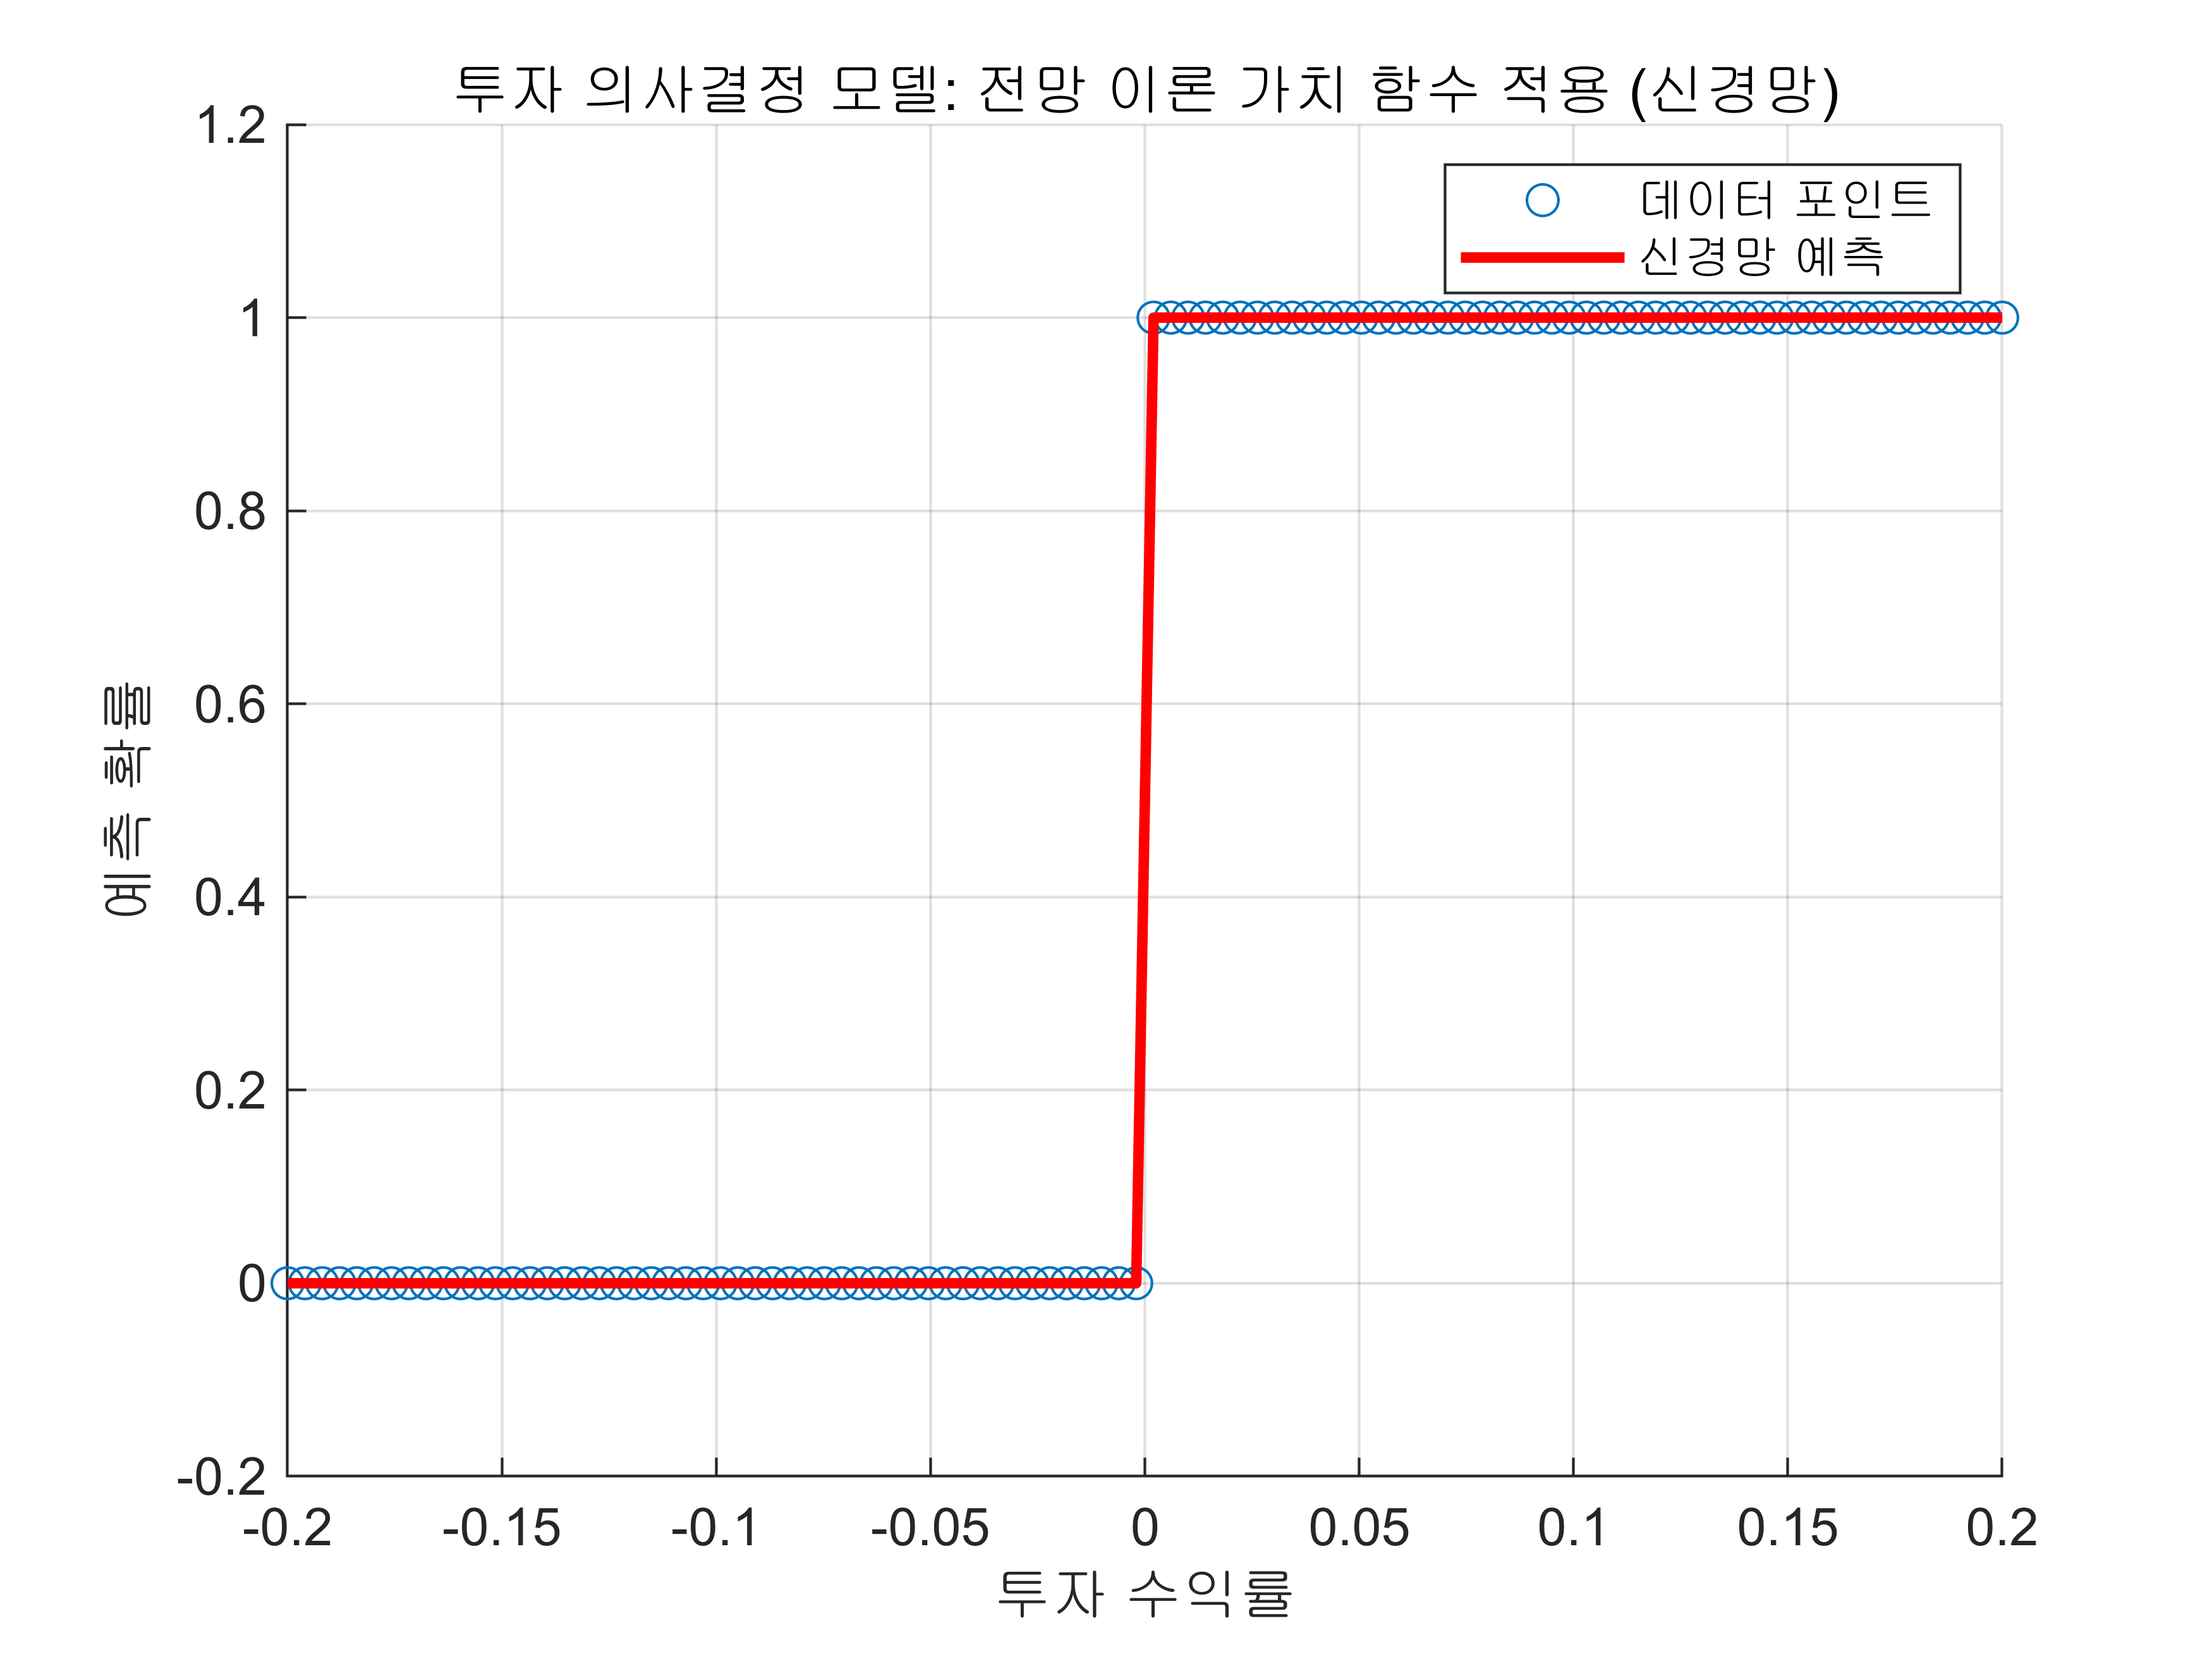

In [12]:

% 4. 예측 및 결과 시각화
yhat_nn = net(prospect_value');

% 결과 시각화
figure;
scatter(returns, outcome, 'o');
hold on;
plot(returns, yhat_nn, 'r-', 'LineWidth', 2);
xlabel('투자 수익률');
ylabel('예측 확률');
title('투자 의사결정 모델: 전망 이론 가치 함수 적용 (신경망)');
legend('데이터 포인트', '신경망 예측');
grid on;


**2. 소비자 구매 결정 모델의 신경망 이론****이론적 배경**

-  **소비자 구매 의사결정**: 소비자들은 제품 가격의 변화에 따라 구매 여부를 결정합니다. 가격 인하(할인)는 이득으로 인식되어 구매 의향을 높이고, 가격 인상은 손실로 인식되어 구매를 억제할 수 있습니다.
-  **전망 이론의 적용**: 소비자들은 가격 변화에 대해 비대칭적으로 반응합니다. 특히 손실(가격 인상)에 대해 더 민감하게 반응하는 경향이 있습니다. 전망 이론의 가치 함수를 사용하여 이러한 반응을 모델에 반영합니다.

**신경망의 역할**

-  **복잡한 구매 패턴 학습**: 소비자 구매 결정은 가격 변화와 구매 여부 사이에 비선형적인 관계가 존재할 수 있습니다. 신경망은 이러한 복잡한 관계를 학습하고 예측하는 데 적합합니다.
-  **전망 이론 가치 함수의 통합**: 신경망은 전망 이론의 가치 함수를 입력 특성으로 사용하여, 소비자들이 가격 변화에 어떻게 반응하는지를 학습할 수 있습니다. 이를 통해 단순한 로지스틱 회귀보다 복잡한 구매 의사결정 패턴을 반영할 수 있습니다.
-  **은닉층의 역할**: 신경망의 은닉층은 가격 변화에 대한 소비자의 이득/손실 평가를 처리하여, 구매 결정에 미치는 영향을 파악합니다.

**모델의 기대 효과**

-  소비자 구매 결정 모델의 신경망은 가격 변화에 따른 소비자의 구매 의향을 예측하는 데 활용됩니다.
-  이 모델은 할인 및 가격 인상에 대한 소비자 반응을 더 잘 이해하는 데 도움이 되며, 마케팅 전략 수립 및 가격 결정 과정에서 유용하게 활용될 수 있습니다.

**결론**

-  **신경망의 이점**: 투자 의사결정과 소비자 구매 결정 모두 비선형적인 특성을 가지며, 단순한 선형 모델로는 충분히 설명하기 어려운 복잡한 패턴을 포함하고 있습니다. 신경망은 이러한 비선형 패턴을 학습하고 예측하는 데 적합한 도구입니다.
-  **전망 이론의 통합**: 전망 이론의 가치 함수를 신경망의 입력 특성으로 통합함으로써, 모델이 이득과 손실에 대한 비대칭적 반응을 학습하도록 합니다. 이를 통해 모델은 실제 의사결정 과정을 더 잘 반영할 수 있습니다.
-  **실제 응용**: 이러한 신경망 모델은 금융 분야의 투자 분석, 소비자 행동 예측, 마케팅 전략 수립 등 다양한 분야에서 활용될 수 있습니다. 특히, 인간의 심리적 요소를 고려한 의사결정 모델링에 큰 장점을 제공합니다.


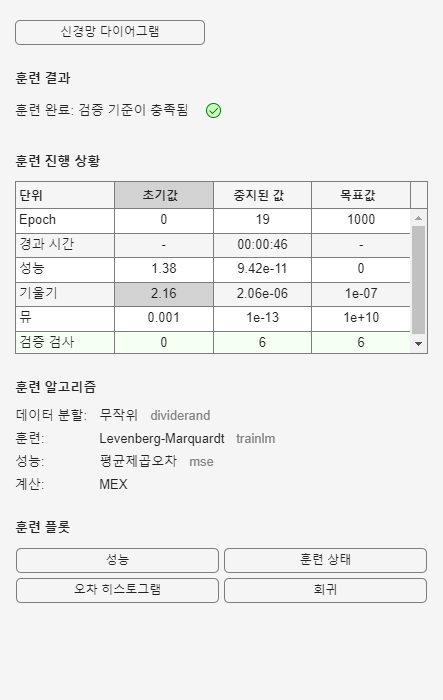

In [13]:
% 신경망을 사용하여 소비자 구매 결정 모델 학습

% 1. 데이터 준비
num_samples = 100;
price_change = linspace(-0.5, 0.5, num_samples)'; % -50%에서 50%까지의 가격 변화
purchase_decision = (price_change < 0) + 0; % 가격 인하(할인) 시 구매 (1), 가격 인상 시 비구매 (0)

% 2. 전망 이론 가치 함수 적용
alpha = 0.88;
beta = 0.88;
lambda = 2.25;

% 가치 함수 적용
prospect_value = zeros(size(price_change));
for i = 1:length(price_change)
    if price_change(i) >= 0
        prospect_value(i) = price_change(i)^alpha;
    else
        prospect_value(i) = -lambda * (-price_change(i))^beta;
    end
end

% 3. 신경망 모델 학습
% 신경망 구조 설정
net = feedforwardnet(10); % 10개의 은닉층 뉴런
net = train(net, prospect_value', purchase_decision');


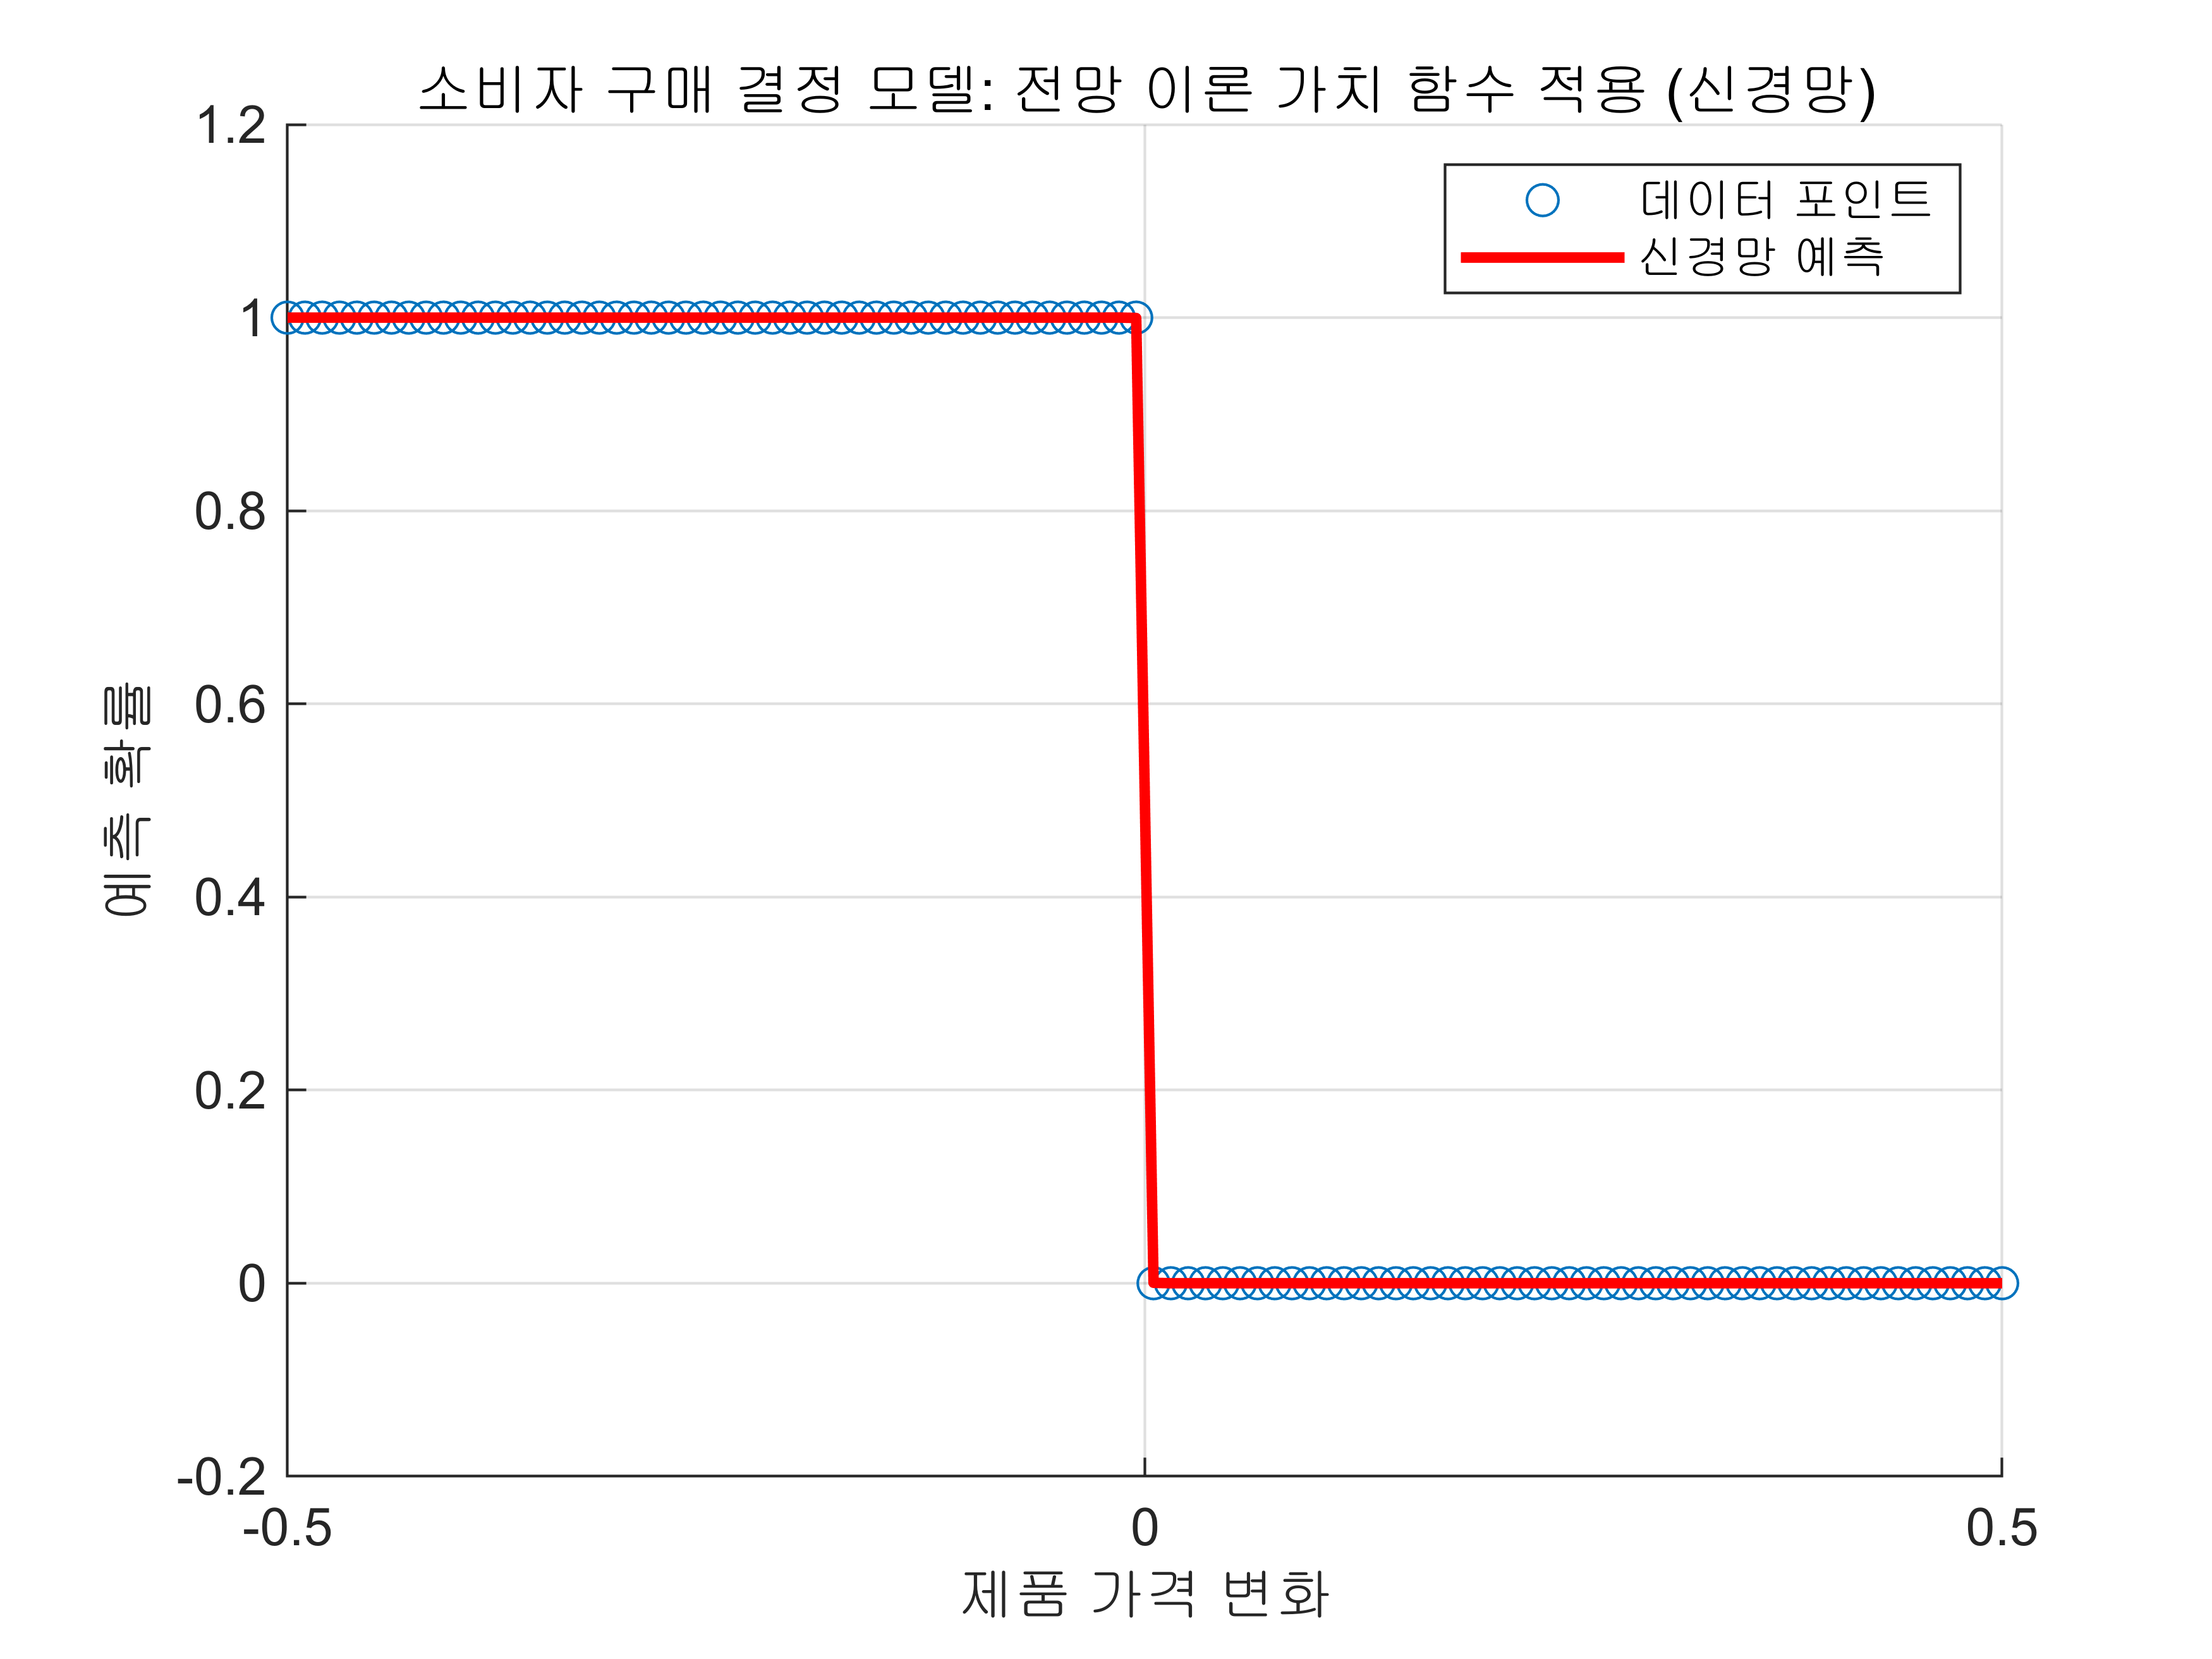

In [14]:

% 4. 예측 및 결과 시각화
yhat_nn = net(prospect_value');

% 결과 시각화
figure;
scatter(price_change, purchase_decision, 'o');
hold on;
plot(price_change, yhat_nn, 'r-', 'LineWidth', 2);
xlabel('제품 가격 변화');
ylabel('예측 확률');
title('소비자 구매 결정 모델: 전망 이론 가치 함수 적용 (신경망)');
legend('데이터 포인트', '신경망 예측');
grid on;



!!!EndOutputRegion!!!